In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 8.0)

conn = sqlite3.connect("cars.db")

pd.options.display.max_columns = None

In [2]:
df = pd.read_sql_query("select * from cars;", conn)
df

id sorgente_id      sorgente  \
0        1   324665351  autoscout.it   
1        2   328082382  autoscout.it   
2        3   223415084     subito.it   
3        4   223278748     subito.it   
4        5   223279066     subito.it   
5        6   223279185     subito.it   
6        7   223285809     subito.it   
7        8   223286896     subito.it   
8        9   223288785     subito.it   
9       10   223294988     subito.it   
10      11   223380387     subito.it   
11      12   223385684     subito.it   
12      13   219931806     subito.it   
13      14   223096423     subito.it   
14      15   219964516     subito.it   
15      16   219200281     subito.it   
16      17   223395756     subito.it   
17      18   223413335     subito.it   
18      19   223414583     subito.it   
19      20   223303907     subito.it   
20      21   223317826     subito.it   
21      22   221545141     subito.it   
22      23   223333890     subito.it   
23      24   223333891     subito.it   
24      25   223293493     subito.it   
25      26   223147316     subito.it   
26      27   223157094     subito.it   
27      28   223159359     subito.it   
28      29   223162268     subito.it   
29      30   220939990     subito.it   
...    ...         ...           ...   
3990  3991   227328841     subito.it   
3991  3992   227329997     subito.it   
3992  3993   227330223     subito.it   
3993  3994   227330457     subito.it   
3994  3995   227330716     subito.it   
3995  3996   227330747     subito.it   
3996  3997   227331453     subito.it   
3997  3998   227331781     subito.it   
3998  3999   227331928     subito.it   
3999  4000   227337140     subito.it   
4000  4001   227337267     subito.it   
4001  4002   227337705     subito.it   
4002  4003   227035380     subito.it   
4003  4004   227038444     subito.it   
4004  4005   227039659     subito.it   
4005  4006   227041340     subito.it   
4006  4007   212054755     subito.it   
4007  4008   227042468     subito.it   
4008  4009   227051422     subito.it   
4009  4010   227051521     subito.it   
4010  4011   227055025     subito.it   
4011  4012   227057596     subito.it   
4012  4013   227063279     subito.it   
4013  4014   227064637     subito.it   
4014  4015   227067033     subito.it   
4015  4016   227067280     subito.it   
4016  4017   227331963     subito.it   
4017  4018   227336377     subito.it   
4018  4019   227335711     subito.it   
4019  4020   227655452     subito.it   

                                        titolo_annuncio  \
0                Hyundai iX35 1.7 CRDi Xpossible 2WD FL   
1                   Hyundai iX35 1.7 CRDi 2WD Xpossible   
2                          hyundai-ix35-1-7-diesel-2012   
3                                     hyundai-ix35-2013   
4      hyundai-ix35-2-0-crdi-184cv-high-4wd-comfor-2013   
5                  hyundai-ix35-1-7-crdi-2wd-style-2011   
6                                     hyundai-ix35-2012   
7               hyundai-ix35-2-0-crdi-4wd-xpossible-a-t   
8                            hyundai-ix-35-1-7-crdi-2wd   
9        hyundai-ix35-1-7crdi-xpossible-uniprop-55000km   
10                      hyundai-ix35-2013-1-7-vers-move   
11           hyundai-ix35-2-0-crdi-4wd-comfort-led-2014   
12                                              vetrina   
13                                    hyundai-ix35-2015   
14                                    hyundai-ix35-2013   
15               hyundai-ix35-1-7-cdi-unicoproprietario   
16         hyundai-ix35-1-6-gdi-16v-2wd-uniproprietario   
17               hyundai-ix35-1-7-crdi-2wd-comfort-2014   
18                                    hyundai-ix35-2010   
19                                         hyundai-ix35   
20                                    hyundai-ix35-2012   
21                                    hyundai-ix35-2011   
22                    hyundai-ix35-1-7-crdi-2wd-comfort   
23                    hyundai-ix35-2-0-crdi-4wd-comfort   
24                                    hyundai-ix35-2

In [3]:
df.shape

(4020, 33)

In [4]:
df.columns

Index(['id', 'sorgente_id', 'sorgente', 'titolo_annuncio', 'uuid', 'marca',
       'modello', 'carburante', 'cambio', 'anno_imm', 'mese_imm', 'km_num',
       'km_range', 'allestimento', 'dove', 'colore', 'regione', 'provincia',
       'cap', 'sorgente_user_id', 'sorgente_username', 'ultimo_scrape',
       'descrizione_utente', 'sorgente_url', 'tipo_inserzionista', 'prezzo',
       'pubblicato_il', 'anzianita_giorni', 'annuncio_padre_uuid', 'trazione',
       'nome_versione', 'cilindrata', 'created'],
      dtype='object')

In [5]:
def get_col_stat(df, col):
    if type(col) == list:
        
        group_count = df.groupby(col).size()
    else:
        print(df[col].describe())
        group_count = df.groupby([col, ]).size()
        
    group_sum_perc = group_count.apply(lambda x: (x / group_count.sum()) * 100).round(2).rename("%")
    fdf = pd.concat([group_count.rename("count"), group_sum_perc], axis=1).sort_values('count', ascending=False)
    return fdf

def print_col_stat(df, col):
    print(get_stats(df, col))
    
def print_stats(df, col_list):
    for col in col_list:
        print("-" * 50)
        print("-" * 50)
        print("# {}".format(col))
        print("-" * 50)
        print(get_col_stat(df, col))

In [6]:
print_stats(df, ['marca', 'modello', 'colore', 'cambio', 'trazione', 'carburante', 'nome_versione', 
                 ['modello', 'nome_versione'],
                 ['modello', 'cilindrata'],
                 ['modello', 'colore']
                ])

--------------------------------------------------
--------------------------------------------------
# marca
--------------------------------------------------
count        4020
unique          4
top       hyundai
freq         1629
Name: marca, dtype: object
         count      %
marca                
hyundai   1629  40.52
kia        987  24.55
ford       766  19.05
nissan     638  15.87
--------------------------------------------------
--------------------------------------------------
# modello
--------------------------------------------------
count     4020
unique       4
top       ix35
freq      1629
Name: modello, dtype: object
          count      %
modello               
ix35       1629  40.52
sportage    987  24.55
kuga        766  19.05
qashqai     638  15.87
--------------------------------------------------
--------------------------------------------------
# colore
--------------------------------------------------
count       4020
unique        14
top       bianco
freq 

In [7]:
print(df.groupby(['marca','nome_versione']).size())
print(df.groupby(['marca','cilindrata']).size())

marca    nome_versione
ford                      766
hyundai  classic          171
         comfort          748
         high             240
         style            143
         xpossible        327
kia                       198
         active           152
         class            257
         cool             335
         feel rebel        45
nissan                    425
         business           9
         connecta          55
         tekna            100
         visia             49
dtype: int64
marca    cilindrata
ford                   766
hyundai                 21
         1.7           922
         2.0           450
kia                    117
         1.6            75
         1.7           636
         2.0           159
nissan                 638
dtype: int64


In [8]:
# aggiungo colonne numeriche
df['rivenditore'] = df.eval('tipo_inserzionista == "d" or tipo_inserzionista == "azienda"').astype(int)

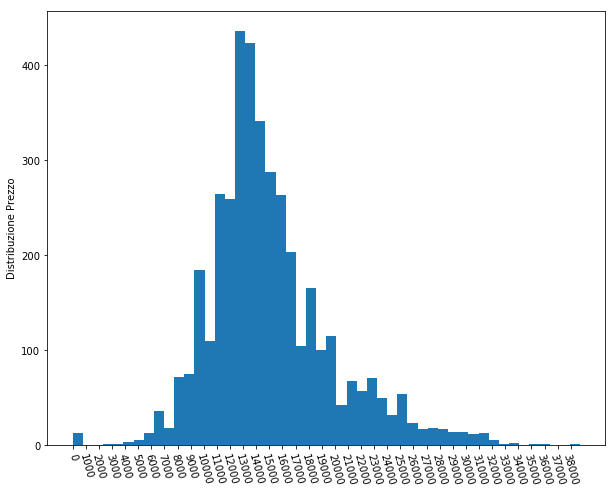

In [9]:
# analizzo la distribuzione dei prezzi

x = df['prezzo']
plt.hist(x, bins=50)
plt.ylabel('Distribuzione Prezzo')
plt.xticks(np.arange(min(x)-1, max(x), 1000.0), rotation=-75)
plt.plot();

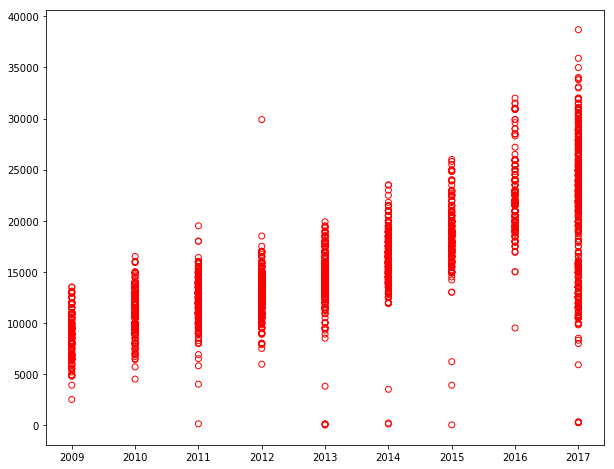

In [10]:
# prezzo e anno
x = df['anno_imm']
y = df['prezzo']
plt.scatter(x, y, facecolors='none', edgecolors='r')
plt.plot();

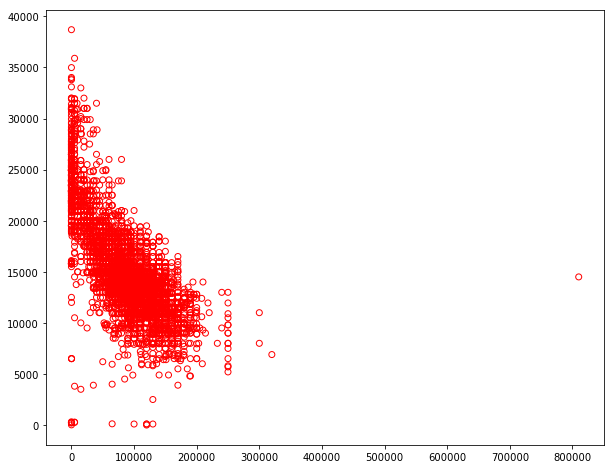

In [11]:
# prezzo e km
x = df['km_num']
y = df['prezzo']
plt.scatter(x, y, facecolors='none', edgecolors='r')
plt.plot();

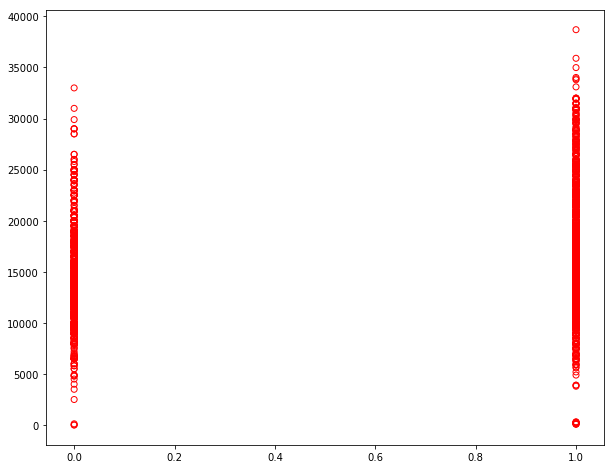

In [12]:
# prezzo e anno
x = df['rivenditore']
y = df['prezzo']
plt.scatter(x, y, facecolors='none', edgecolors='r')
plt.plot();

In [13]:
df_colori = df.groupby('colore').count()
df_colori = df_colori['id']
df_colori

colore
                618
argento         123
beige             8
bianco         1449
blu              42
blu/azzurro      27
bronzo           19
giallo            2
grigio          907
marrone          50
nero            741
oro               4
rosso            25
verde             5
Name: id, dtype: int64

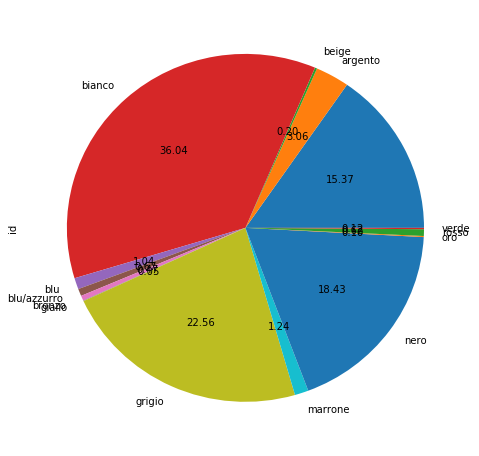

In [14]:
df_colori.plot.pie(figsize=(8, 8), autopct='%.2f')

In [15]:
df_group = df.groupby('carburante').count()
df_group = df_group['id']
df_group

carburante
             71
altro         6
benzina     228
diesel     3580
gpl         132
metano        3
Name: id, dtype: int64

In [ ]:
df['ultimo_scrape'] = pd.to_datetime(df['ultimo_scrape'], errors='coerce')

In [ ]:
import datetime
df['venduta'] = df['ultimo_scrape'].dt.date.apply(lambda x: 1 if x < datetime.date.today() else 0)
df['venduta']

In [ ]:
df[df['venduta']==1]